In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
dataset= pd.read_csv("Social_Network_Ads.csv")
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

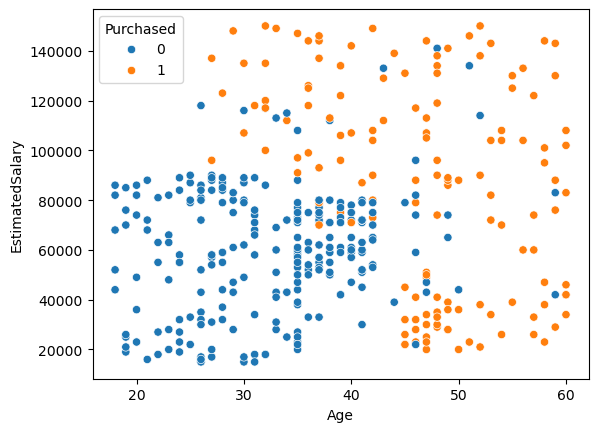

In [4]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset,hue="Purchased")

In [3]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
x=dataset.iloc[:,:-1]
y=dataset["Purchased"]

In [8]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc=StandardScaler()
sc.fit(x)

StandardScaler()

In [12]:
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier


To find the best value for k we are using loop

In [36]:
for i in range(1, 20):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train, y_train)
    
    # Score on training data
    train_score = knn1.score(x_train, y_train)*100
    
    # Score on test data
    test_score = knn1.score(x_test, y_test)*100
    
    print(f"k value: {i}, Training Accuracy: {train_score}, Test Accuracy: {test_score}")


k value: 1, Training Accuracy: 99.6875, Test Accuracy: 85.0
k value: 2, Training Accuracy: 91.5625, Test Accuracy: 86.25
k value: 3, Training Accuracy: 92.5, Test Accuracy: 92.5
k value: 4, Training Accuracy: 91.5625, Test Accuracy: 92.5
k value: 5, Training Accuracy: 90.9375, Test Accuracy: 92.5
k value: 6, Training Accuracy: 90.9375, Test Accuracy: 90.0
k value: 7, Training Accuracy: 91.875, Test Accuracy: 93.75
k value: 8, Training Accuracy: 90.625, Test Accuracy: 92.5
k value: 9, Training Accuracy: 91.25, Test Accuracy: 93.75
k value: 10, Training Accuracy: 90.625, Test Accuracy: 92.5
k value: 11, Training Accuracy: 90.9375, Test Accuracy: 92.5
k value: 12, Training Accuracy: 91.25, Test Accuracy: 92.5
k value: 13, Training Accuracy: 91.5625, Test Accuracy: 92.5
k value: 14, Training Accuracy: 90.625, Test Accuracy: 92.5
k value: 15, Training Accuracy: 90.625, Test Accuracy: 92.5
k value: 16, Training Accuracy: 90.0, Test Accuracy: 92.5
k value: 17, Training Accuracy: 90.3125, Test

K=3 is best value

Now we train our model according to k=3

In [27]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
# Score on training data
train_score = knn.score(x_train, y_train)*100
    
    # Score on test data
test_score = knn.score(x_test, y_test)*100
    
print(f" Training Accuracy: {train_score}, Test Accuracy: {test_score}")

 Training Accuracy: 92.5, Test Accuracy: 92.5


In [30]:
knn.predict([[-1.781797,	-1.490046]])

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [32]:
knn.predict([[1.083596	,-0.990844]])

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [37]:
x,y

(          Age  EstimatedSalary
 0   -1.781797        -1.490046
 1   -0.253587        -1.460681
 2   -1.113206        -0.785290
 3   -1.017692        -0.374182
 4   -1.781797         0.183751
 ..        ...              ...
 395  0.797057        -0.844019
 396  1.274623        -1.372587
 397  1.179110        -1.460681
 398 -0.158074        -1.078938
 399  1.083596        -0.990844
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

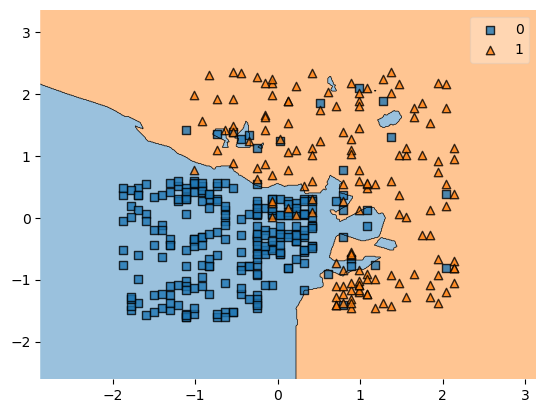

In [39]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn)